In [22]:
# Convolutional Neural Network

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128,128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

#Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a third convolution layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

#Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a fourth convolution layer
classifier.add(Conv2D(256, (3, 3), activation = 'relu'))

#Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a fourth convolution layer
classifier.add(Conv2D(256, (3, 3), activation = 'relu'))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units =7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train_dog',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/test_dog',
                                            target_size = (128,128),
                                            batch_size =32,
                                            class_mode = 'categorical')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 20,
                         epochs =15,
                         validation_data = test_set,
                         validation_steps = 5)

Found 603 images belonging to 7 classes.
Found 144 images belonging to 7 classes.
Epoch 1/15
11/20 [===============>..............] - ETA: 21s - loss: 1.9776 - acc: 0.1676

C:\Users\ravit\Anaconda\lib\site-packages\PIL\Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


20/20 [==============================] - 51s 3s/step - loss: 1.9196 - acc: 0.1915 - val_loss: 1.8400 - val_acc: 0.2708
Epoch 2/15
20/20 [==============================] - 48s 2s/step - loss: 1.7844 - acc: 0.2330 - val_loss: 1.8393 - val_acc: 0.2708
Epoch 3/15
20/20 [==============================] - 48s 2s/step - loss: 1.7309 - acc: 0.2872 - val_loss: 1.6631 - val_acc: 0.3333
Epoch 4/15
20/20 [==============================] - 56s 3s/step - loss: 1.6671 - acc: 0.3104 - val_loss: 1.6194 - val_acc: 0.3472
Epoch 5/15
20/20 [==============================] - 58s 3s/step - loss: 1.5974 - acc: 0.3579 - val_loss: 1.6910 - val_acc: 0.3472
Epoch 6/15
20/20 [==============================] - 67s 3s/step - loss: 1.5924 - acc: 0.3875 - val_loss: 1.6089 - val_acc: 0.3472
Epoch 7/15
20/20 [==============================] - 59s 3s/step - loss: 1.5118 - acc: 0.3813 - val_loss: 1.8017 - val_acc: 0.2847
Epoch 8/15
20/20 [==============================] - 52s 3s/step - loss: 1.5316 - acc: 0.4063 - val_lo

In [50]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dob6.jpg', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
print(result)

{'Beagle': 0, 'Dalmation': 1, 'Dobberman': 2, 'German': 3, 'Golden': 4, 'ShihTzu': 5, 'french-bulldog': 6}
[[0.000000e+00 0.000000e+00 2.264855e-11 1.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00]]



plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("bull.jpg")
plt.imshow(image)
plt.show()



<Figure size 640x480 with 1 Axes>

In [51]:
classifier.save('Imgclassifier.h5')

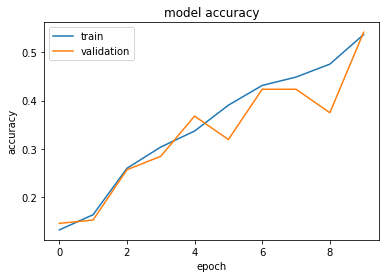

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

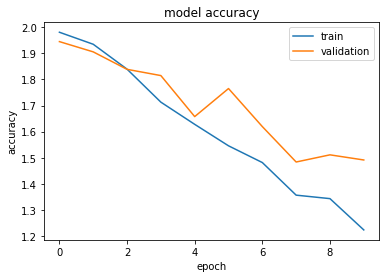

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()from